In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [29]:
data_dir_list =os.listdir('C:/Users/Sristi/Desktop/Notebooks/flipkart_images')

path, dirs, files = next(os.walk("C:/Users/Sristi/Desktop/Notebooks/flipkart_images"))
file_count = len(files)
print(file_count)

original_dataset_dir = 'C:/Users/Sristi/Desktop/Notebooks/flipkart_images'
base_dir = 'C:/Users/Sristi/Desktop/Notebooks/jeans_and_trousers_small'
os.mkdir(base_dir)

200


In [30]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_jeans_dir = os.path.join(train_dir, 'jeans')
os.mkdir(train_jeans_dir)

train_trousers_dir = os.path.join(train_dir, 'trousers')
os.mkdir(train_trousers_dir)

validation_jeans_dir = os.path.join(validation_dir, 'jeans')
os.mkdir(validation_jeans_dir)

validation_trousers_dir = os.path.join(validation_dir, 'trousers')
os.mkdir(validation_trousers_dir)

test_jeans_dir = os.path.join(test_dir, 'jeans')
os.mkdir(test_jeans_dir)

test_trousers_dir = os.path.join(test_dir, 'trousers')
os.mkdir(test_trousers_dir)

In [32]:
import shutil
fnames = ['jeans.{}.jpeg'.format(i) for i in range(60)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_jeans_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['jeans.{}.jpeg'.format(i) for i in range(60, 80)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_jeans_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['jeans.{}.jpeg'.format(i) for i in range(80, 99)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_jeans_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['trousers.{}.jpeg'.format(i) for i in range(60)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_trousers_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['trousers.{}.jpeg'.format(i) for i in range(60, 80)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_trousers_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['trousers.{}.jpeg'.format(i) for i in range(80, 99)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_trousers_dir, fname)
  shutil.copyfile(src, dst)

In [33]:
print('total training jeans images', len(os.listdir(train_jeans_dir)))
print('total training trousers images', len(os.listdir(train_trousers_dir)))

print('total validation jeans images', len(os.listdir(validation_jeans_dir)))
print('total validation trousers images', len(os.listdir(validation_trousers_dir)))

print('total test jeans images', len(os.listdir(test_jeans_dir)))
print('total test trousers images', len(os.listdir(test_trousers_dir)))

total training jeans images 60
total training trousers images 60
total validation jeans images 20
total validation trousers images 20
total test jeans images 19
total test trousers images 19


In [34]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [35]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [58]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range =30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range = [-12, 12],
                                   zoom_range = 0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')


validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


#have very less data, which is why it is showing error: input ran out of data

In [61]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=8)

model.save('jeans_and_trousers_small_1.h5')

Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 0.6949 - acc: 0.5083 - val_loss: 0.6884 - val_acc: 0.5250
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 0.6896 - acc: 0.4750 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 0.6948 - acc: 0.5000 - val_loss: 0.6842 - val_acc: 0.5250
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.6997 - acc: 0.5167 - val_loss: 0.6895 - val_acc: 0.5750
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 0.6933 - acc: 0.4250 - val_loss: 0.6900 - val_acc: 0.5000
Epoch 6/10
6/6 [==============================] - 12s 2s/step - loss: 0.6925 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.4750
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 0.6918 - acc: 0.5500 - val_loss: 0.6840 - val_acc: 0.5500
Epoch 8/10
6/6 [==============================] - 13s 2s/step - loss: 0.6968 - acc: 0.4250 - val_loss: 0

In [ ]:
#above warning results in extreme overfitting/underfitting in my model due to very less samples.

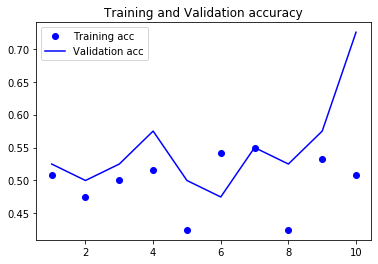

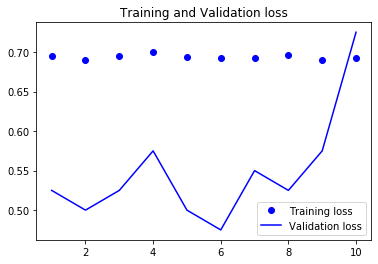

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()